<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/Calculo_004_out_14_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# carrega as bibliotecas do python

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import os 
import cv2
import zipfile
from skimage import data
from skimage import filters
from skimage import exposure
import numpy as np
from google.colab import files

In [3]:
!wget http://ftp.feq.ufu.br/ubirajara/Sugar_set_30_2019.zip
#!ls -l trash_nov_22_2018.zip


--2019-10-14 15:07:32--  http://ftp.feq.ufu.br/ubirajara/Sugar_set_30_2019.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19584173 (19M) [application/zip]
Saving to: ‘Sugar_set_30_2019.zip.2’

Sugar_set_30_2019.z 100%[===================>]  18.68M  3.95MB/s    in 4.7s    

2019-10-14 15:07:37 (3.95 MB/s) - ‘Sugar_set_30_2019.zip.2’ saved [19584173/19584173]



In [0]:

file_name = zipfile.ZipFile('Sugar_set_30_2019.zip', 'r')
file_name.extractall() 

In [0]:
# all images are load in variable x...
FILE='Sugar_set_30_2019.zip'
img_name=[]
x=[]
p=[]
w=[]


with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #x.append(cv2.imread(name))
        x.append(cv2.resize(cv2.imread(name),(64,64)))
        p.append(cv2.cvtColor(cv2.imread(name), cv2.COLOR_RGB2GRAY))

Num=len(img_name)

for i in range(Num):
    w.append(cv2.cvtColor(np.array(x[i]), cv2.COLOR_BGR2GRAY))


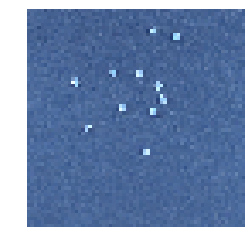

In [6]:
img=plt.imread(img_name[2])
plt.axis("off")
plt.imshow(x[2])

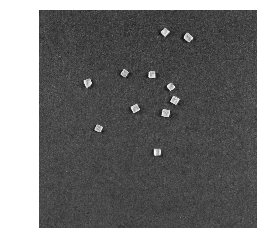

In [7]:
img=plt.imread(img_name[2])
plt.axis("off")
plt.imshow(p[2], cmap = "gray")

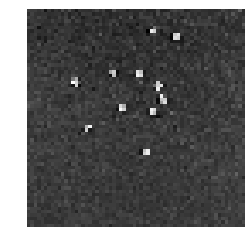

In [8]:
plt.axis("off")
plt.imshow(w[2], cmap = "gray")

In [9]:
print(w[2])

[[118 115 116 ... 116 143 104]
 [106 120 109 ... 115 109 104]
 [121 114 109 ... 124 108 117]
 ...
 [110 108 107 ... 117 120 114]
 [115 119 110 ... 116 111 124]
 [110 123 109 ... 113 116 114]]


In [10]:
print(len(w[2]))

64


In [11]:
print(x[2])

[[[ 83 108 151]
  [ 78 104 151]
  [ 77 105 152]
  ...
  [ 79 105 152]
  [106 133 176]
  [ 64  92 142]]

 [[ 67  94 144]
  [ 81 109 156]
  [ 68  98 147]
  ...
  [ 74 103 154]
  [ 70  97 147]
  [ 60  92 144]]

 [[ 82 109 159]
  [ 77 103 150]
  [ 72  98 145]
  ...
  [ 85 114 158]
  [ 69  96 147]
  [ 76 106 155]]

 ...

 [[ 71  99 148]
  [ 65  97 146]
  [ 66  95 146]
  ...
  [ 73 106 155]
  [ 79 109 158]
  [ 71 103 152]]

 [[ 74 103 154]
  [ 80 107 157]
  [ 69  98 149]
  ...
  [ 72 105 155]
  [ 68 101 147]
  [ 81 114 160]]

 [[ 71  98 149]
  [ 84 112 159]
  [ 68  97 148]
  ...
  [ 69 102 152]
  [ 72 105 154]
  [ 70 103 152]]]


In [12]:
Nrow=64
Ncol=64
Entropia=0 # estamos calculando da primeira foto
for i in range(Nrow):
  for j in range(Ncol):
    Entropia=Entropia-p[0][i,j]*np.log(p[0][i,j])
print("Entropia=",Entropia)


Entropia= -1718510.75


In [13]:
print(img_name)
Nfotos=len(img_name)
print(Nfotos)

['IMG_16_0634.jpg', 'IMG_16_0639.jpg', 'IMG_16_0640.jpg', 'IMG_18_0655.jpg', 'IMG_18_0656.jpg', 'IMG_18_0658.jpg', 'IMG_20_0680.jpg', 'IMG_20_0681.jpg', 'IMG_20_0688.jpg', 'IMG_25_0703.jpg', 'IMG_25_0706.jpg', 'IMG_25_0710.jpg', 'IMG_30_0732.jpg', 'IMG_30_0735.jpg', 'IMG_30_0737.jpg', 'IMG_35_0751.jpg', 'IMG_35_0757.jpg', 'IMG_35_0760.jpg', 'IMG_40_0776.jpg', 'IMG_40_0777.jpg', 'IMG_40_0780.jpg', 'IMG_70_0816.jpg', 'IMG_70_0818.jpg', 'IMG_70_0821.jpg']
24


In [0]:
Nfotos=len(img_name)
GLCM=np.zeros((Nfotos, 6))   # lembrar do ANN_Hydrofoil_Neuronio_set_17_2018.ipynb

for k in range(Nfotos):
  Nrow=np.copy(len(w[k][0,:]))
  Ncol=np.copy(len(w[k][:,0]))
  for i in range(Nrow):
    for j in range(Ncol):
      GLCM[k,0]=GLCM[k,0]-w[k][i,j]*np.log(w[k][i,j])


In [15]:
print(GLCM)

[[-2226516.           0.           0.           0.   ]
 [-2233982.75         0.           0.           0.   ]
 [-2225965.           0.           0.           0.   ]
 [-2244433.75         0.           0.           0.   ]
 [-2092762.375        0.           0.           0.   ]
 [-2254302.25         0.           0.           0.   ]
 [-2252049.           0.           0.           0.   ]
 [-2262891.75         0.           0.           0.   ]
 [-2471811.5          0.           0.           0.   ]
 [-2463436.25         0.           0.           0.   ]
 [-2496280.           0.           0.           0.   ]
 [-2446249.25         0.           0.           0.   ]
 [-2482637.5          0.           0.           0.   ]
 [-2536942.5          0.           0.           0.   ]
 [-2599177.75         0.           0.           0.   ]
 [-2315185.           0.           0.           0.   ]
 [-2190066.25         0.           0.           0.   ]
 [-2243507.25         0.           0.           0.   ]
 [-2434409